In [2]:
from ultralytics import YOLO

In [1]:
import json
with open('ign25synth_train.json',mode='r', encoding='utf8') as f:
    data = json.load(f)


In [2]:
data[0]['groups'][1]

[{'vertices': [[1054.605523013901, 113.67182332876045],
   [1085.152398013746, 113.67182332876045],
   [1085.152398013746, 123.99994832916562],
   [1054.605523013901, 123.99994832916562],
   [1054.605523013901, 113.67182332876045]],
  'text': '3',
  'illegible': False,
  'truncated': False}]

In [55]:
for i in data[0]['groups'] :
    for x, y in i[0]['vertices'] : 
        print(x/2000,y/2000)


0.9594733029532913 0.5656936108711488
0.9698014279533447 0.5656936108711488
0.9698014279533447 0.580967048371599
0.9594733029532913 0.580967048371599
0.9594733029532913 0.5656936108711488
0.5273027615069504 0.05683591166438023
0.542576199006873 0.05683591166438023
0.542576199006873 0.06199997416458281
0.5273027615069504 0.06199997416458281
0.5273027615069504 0.05683591166438023
0.3601822224208238 0.4114035806601749
0.36534628492085053 0.4114035806601749
0.36534628492085053 0.42667701816062503
0.3601822224208238 0.42667701816062503
0.3601822224208238 0.4114035806601749
0.24212460896968163 0.7537776452117794
0.252924560197999 0.7429776939836378
0.25657610381018575 0.7466292375954728
0.2457761525818684 0.7574291888236143
0.24212460896968163 0.7537776452117794
0.018735300421748546 0.13732721760385075
0.03136811292170353 0.13732721760385075
0.03136811292170353 0.1581631551040871
0.018735300421748546 0.1581631551040871
0.018735300421748546 0.13732721760385075
0.09939567361036146 0.7661791813

In [4]:
import os 

os.makedirs('train', exist_ok=True)
os.makedirs('train/labels', exist_ok=True)
os.makedirs('train/images', exist_ok=True)

In [ ]:
from tqdm import tqdm
## Création des fichiers labels 
# parcourir le json 
for file in tqdm(data) : 
    #Récupération du nom 
    path = file['image']
    file_name = path.split('/')[-1]
    label_file= file_name.split('.')[0] + '.txt'

    ## Coordonnées :
    for text in data[0]['groups'] :
        coords = text[0]['vertices']
        # Normalisation des coordonnées
        coords = [(x/2000, y/2000) for x, y in coords]
        # Conversion en format YOLO
        coords = [f"{x} {y}" for x, y in coords]
        # Écriture dans le fichier
        with open(os.path.join('train/labels', label_file), 'w') as f:
            #chaque ligne doit commencer par un classe 
            f.write(f"0 {' '.join(coords)}\n")
        # Copie de l'image
        os.system(f'cp {path} train/images/{file_name}')
 
       
        


100%|██████████| 18073/18073 [06:59<00:00, 43.08it/s]


In [12]:
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import shutil
def split_data(img_folder, label_folder, output_folder, train_ratio=0.8):
    #S'assurer que train et val sont créés
    for split in ['train','val'] : 
        os.makedirs(os.path.join(output_folder,split,'images'),exist_ok=True)
        os.makedirs(os.path.join(output_folder,split,'labels'),exist_ok=True)
    # vérification des fichiers
    images_file = [f for f in os.listdir(img_folder) if f.endswith('.jpg')]

    labels_file = [f.replace('.jpg','.txt') for f in images_file]

    train_img, val_img, train_label, val_label = train_test_split(
        images_file,
        labels_file,
        train_size=train_ratio,
        random_state= 777   
    )
    def copy_files(files, source, target) : 
        for file in tqdm(files, desc=f"Copying files to {target}"): 
            source_path= os.path.join(source,file)
            target_path = os.path.join(target,file)
            shutil.copy(source_path,target_path)
            #on enlève les fichiers au fur et à mesure
            os.remove(source_path)
    copy_files(train_img, img_folder, os.path.join(output_folder,"train","images"))
    copy_files(train_label, label_folder, os.path.join(output_folder,"train","labels"))
    copy_files(val_img, img_folder, os.path.join(output_folder,"val","images"))
    copy_files(val_label, label_folder, os.path.join(output_folder,"val","labels"))

In [13]:
split_data('/Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/images','/Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/labels','/Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split',train_ratio=0.8)

Copying files to /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/train/images: 100%|██████████| 14458/14458 [00:20<00:00, 701.20it/s]
Copying files to /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/train/labels: 100%|██████████| 14458/14458 [00:07<00:00, 1944.50it/s]
Copying files to /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/val/images: 100%|██████████| 3615/3615 [00:05<00:00, 603.61it/s]
Copying files to /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/val/labels: 100%|██████████| 3615/3615 [00:01<00:00, 2385.47it/s]


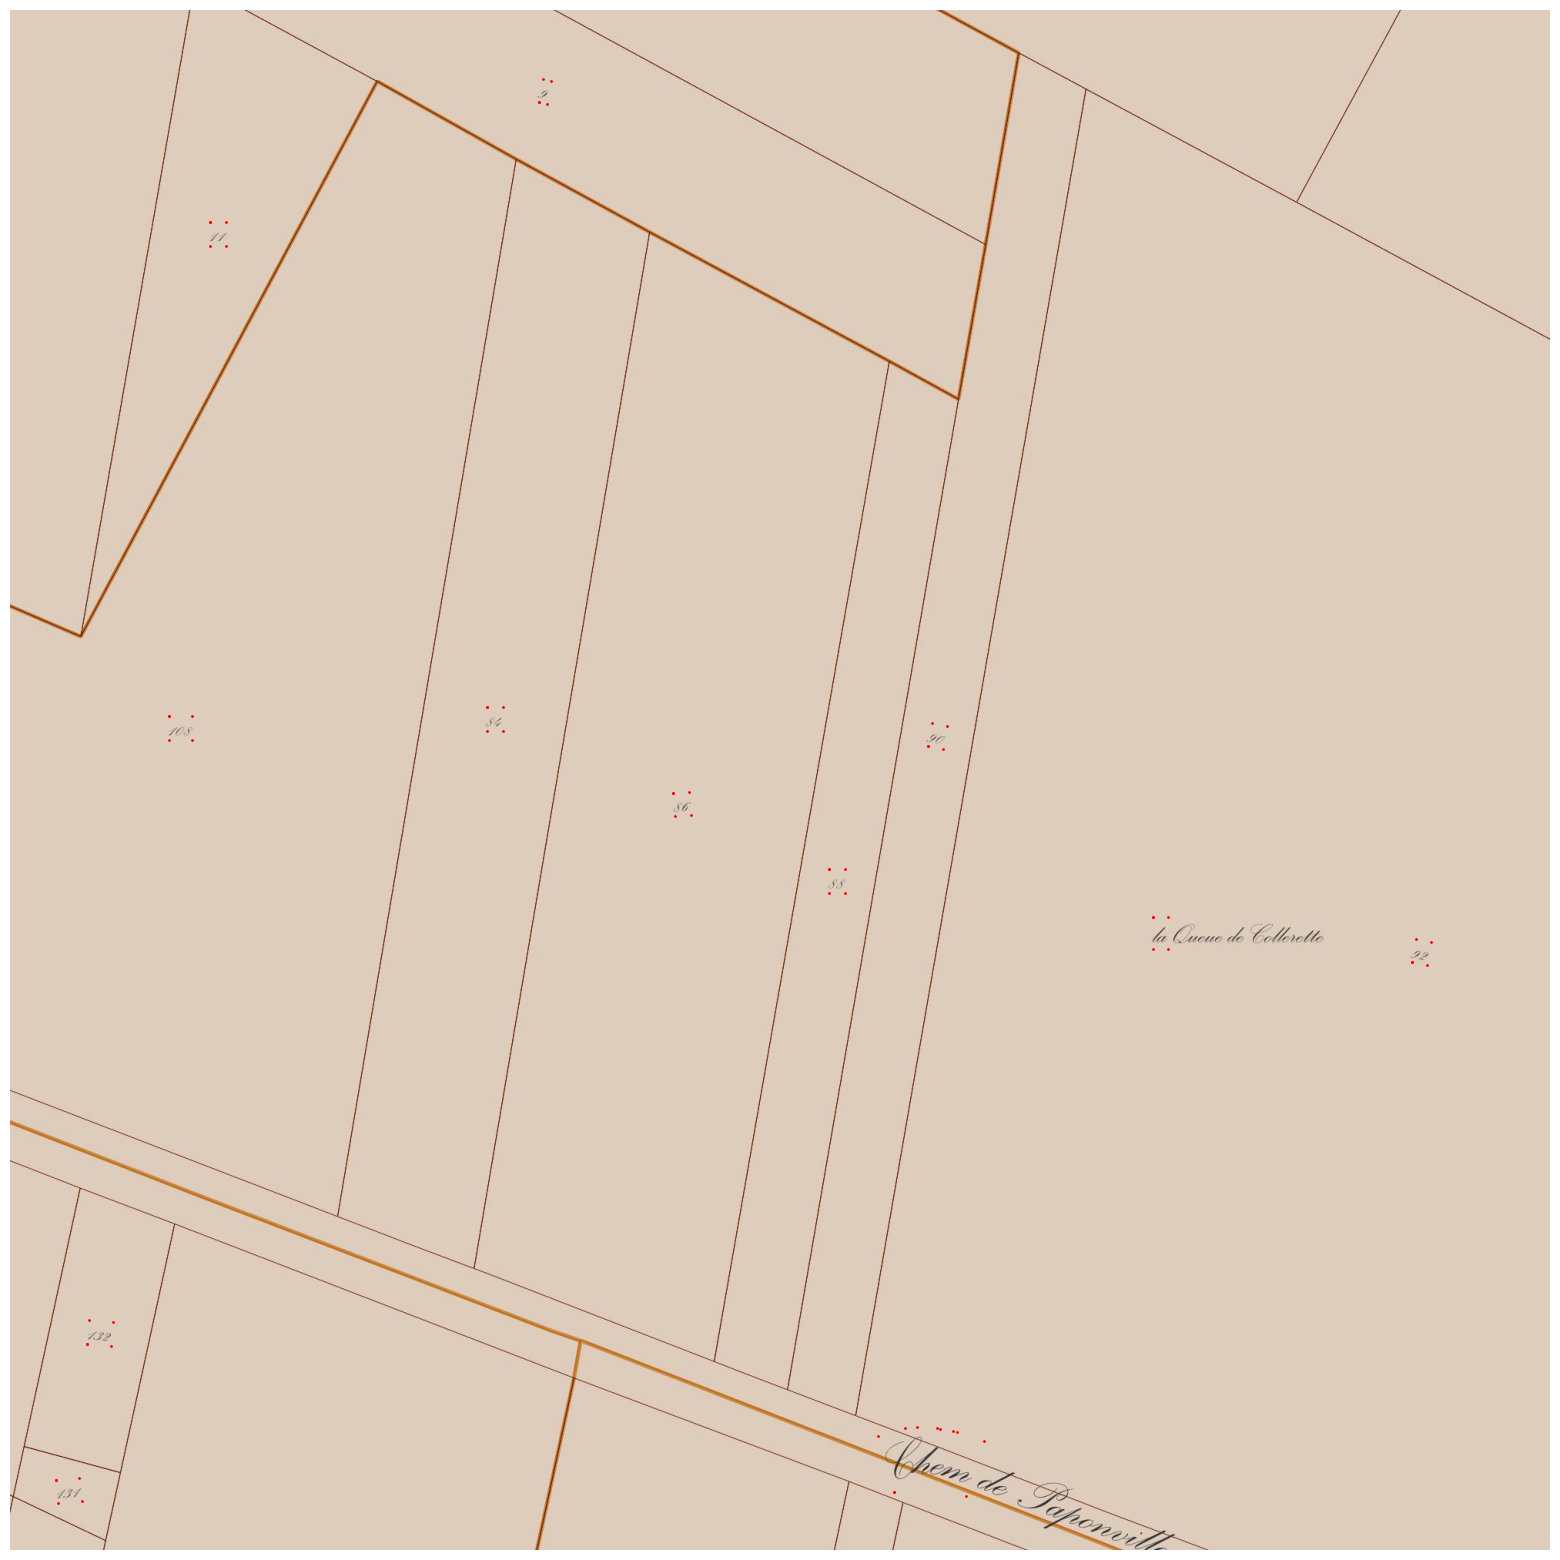

In [44]:
import matplotlib.pyplot as plt
from PIL import Image

# Charge l'image
image_path = 'ign25synth/train/000004.jpg'
image = Image.open(image_path)

# Coordonnées des points (x, y)
#points = data[3]['groups'][0][0]['vertices']

points=[]
for i in data[3]['groups'] :
    for j in i[0]['vertices']:
        points.append(j)

# Affiche l'image
plt.figure(figsize=(20, 20))  # Taille de la figure
plt.imshow(image)
plt.scatter(
    [x for x, y in points],  # les x
    [y for x, y in points],  # les y
    c='red',                 # couleur des points
    s=1                     # taille des points
)
plt.axis('off')  # Masque les axes
plt.show()

In [3]:
## Entraînement YOLO
from ultralytics import YOLO
# Load a model

model = YOLO("/Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/runs/detect/yolo_ign25synth8/weights/best.pt")
# Train the model
model.train(data='config.yaml', epochs=16, imgsz=640, batch=4, name='yolo_ign25synth',device='mps',amp=True, workers=4)

New https://pypi.org/project/ultralytics/8.3.123 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.72 🚀 Python-3.8.20 torch-2.4.1 MPS (Apple M1)
engine/trainer: task=detect, mode=train, model=/Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/runs/detect/yolo_ign25synth8/weights/best.pt, data=config.yaml, epochs=16, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=4, project=None, name=yolo_ign25synth3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

train: Scanning /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/train/labels.cache... 14458 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14458/14458 [00:00<?, ?it/s]
val: Scanning /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/val/labels.cache... 3615 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3615/3615 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo_ign25synth3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolo_ign25synth3
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      1.83G      3.408      3.628     0.9187          1        640: 100%|██████████| 3615/3615 [44:40<00:00,  1.35it/s]     
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [03:39<00:00,  2.06it/s]


                   all       3615       3615   3.75e-06   0.000277   1.92e-06   1.92e-07

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      6.52G      3.338      3.491     0.9124          2        640: 100%|██████████| 3615/3615 [23:05<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [03:05<00:00,  2.44it/s]


                   all       3615       3615     0.0118      0.949     0.0405    0.00967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      7.13G      3.292      3.422      0.908          0        640: 100%|██████████| 3615/3615 [22:21<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:52<00:00,  2.62it/s]


                   all       3615       3615     0.0169      0.486     0.0126    0.00147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      7.93G      3.221       3.32     0.9029          2        640: 100%|██████████| 3615/3615 [22:17<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:52<00:00,  2.62it/s]


                   all       3615       3615     0.0173      0.925     0.0269      0.015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      9.03G      3.157      3.165     0.8955          2        640: 100%|██████████| 3615/3615 [22:15<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:50<00:00,  2.65it/s]


                   all       3615       3615     0.0186      0.991     0.0691      0.035

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      9.97G      3.052      3.104     0.8914          6        640: 100%|██████████| 3615/3615 [22:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:50<00:00,  2.65it/s]


                   all       3615       3615     0.0202      0.994      0.117     0.0887
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      10.5G       2.75      2.614     0.7855          2        640: 100%|██████████| 3615/3615 [21:57<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:49<00:00,  2.67it/s]


                   all       3615       3615     0.0354      0.981      0.204     0.0445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      11.1G      2.708      2.454     0.7931          2        640: 100%|██████████| 3615/3615 [21:56<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:50<00:00,  2.65it/s]


                   all       3615       3615     0.0298      0.999     0.0793     0.0549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      12.8G      2.644      2.372     0.7868          1        640: 100%|██████████| 3615/3615 [22:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:49<00:00,  2.67it/s]


                   all       3615       3615      0.145      0.997      0.796      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16        13G      2.599      2.309     0.8013          2        640: 100%|██████████| 3615/3615 [21:56<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:50<00:00,  2.65it/s]


                   all       3615       3615     0.0447      0.999      0.131     0.0763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      13.6G      2.473      2.255     0.7899          0        640: 100%|██████████| 3615/3615 [21:55<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:49<00:00,  2.67it/s]


                   all       3615       3615      0.887      0.998      0.993      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      14.5G      2.394      2.177     0.7877          2        640: 100%|██████████| 3615/3615 [22:18<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:51<00:00,  2.64it/s]


                   all       3615       3615       0.25      0.997      0.547      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      14.9G      2.304      2.142     0.7844          2        640: 100%|██████████| 3615/3615 [22:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:53<00:00,  2.61it/s]


                   all       3615       3615      0.249          1      0.275      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      15.2G      2.216      2.085      0.786          2        640: 100%|██████████| 3615/3615 [22:21<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:54<00:00,  2.59it/s]


                   all       3615       3615       0.25          1      0.282      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      15.6G       2.14      2.036     0.7769          1        640: 100%|██████████| 3615/3615 [22:22<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:53<00:00,  2.60it/s]


                   all       3615       3615      0.251      0.999      0.496      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      17.4G      2.041      2.035     0.7815          2        640: 100%|██████████| 3615/3615 [23:48<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:54<00:00,  2.60it/s]


                   all       3615       3615        0.5          1      0.994      0.403

16 epochs completed in 7.128 hours.
Optimizer stripped from runs/detect/yolo_ign25synth3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo_ign25synth3/weights/best.pt, 5.5MB

Validating runs/detect/yolo_ign25synth3/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.8.20 torch-2.4.1 MPS (Apple M1)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 452/452 [02:19<00:00,  3.24it/s]


                   all       3615       3615      0.891      0.998      0.993      0.497
Speed: 0.7ms preprocess, 14.9ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/yolo_ign25synth3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x31ad63610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    

In [4]:
model.val()

Ultralytics 8.3.72 🚀 Python-3.8.20 torch-2.4.1 CPU (Apple M1)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /Users/rolly/Documents/10-19_Université_et_scolarité/python_s2/projet/data/split/val/labels.cache... 3615 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3615/3615 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 226/226 [11:49<00:00,  3.14s/it]


                   all       3615       3615    0.00023     0.0279   0.000164   1.65e-05
Speed: 0.6ms preprocess, 184.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x167251f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    